<a href="https://colab.research.google.com/github/anooprnathblq/DSA_Python/blob/main/Anoop_Assign_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/titanic_dataset .csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:

#Null Values in three  FIELDS NAMELY Age,Cabin,Embarked
#As 687 values are missing in Cabin feature ,its better to drop the same

In [6]:
#  droping a CABIN column
df.drop('Cabin',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [7]:
#Filling missing values in embarked column with mode as it is of object type
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [8]:
#decribe the faeture age to see how it is to be distributed
df['Age'].mean()

29.69911764705882

In [9]:
df['Age'].median()

28.0

In [10]:
#As the mean and median of age sare too close it seems to be normally distributed and as such mean is used t fill the null
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [11]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [13]:
df.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,89
SibSp,7
Parch,7
Ticket,681
Fare,248


In [14]:
#as Passenger id and Name features contain all unique values they acan be dropped
df.drop(['PassengerId','Name'],axis=1,inplace=True)

In [15]:
df.nunique()

,0
Survived,2
Pclass,3
Sex,2
Age,89
SibSp,7
Parch,7
Ticket,681
Fare,248
Embarked,3


In [16]:
#Feature Ticket can also be dropped as it has 681 unique values aand is of object type
df.drop('Ticket',axis=1,inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [18]:
#To check whether any other characters likje ? is present in the df
#unique values in each clomn of the df
for i in df.columns:
  print(i,df[i].unique())

Survived [0 1]
Pclass [3 1 2]
Sex ['male' 'female']
Age [22.         38.         26.         35.         29.69911765 54.
  2.         27.         14.          4.         58.         20.
 39.         55.         31.         34.         15.         28.
  8.         19.         40.         66.         42.         21.
 18.          3.          7.         49.         29.         65.
 28.5         5.         11.         45.         17.         32.
 16.         25.          0.83       30.         33.         23.
 24.         46.         59.         71.         37.         47.
 14.5        70.5        32.5        12.          9.         36.5
 51.         55.5        40.5        44.          1.         61.
 56.         50.         36.         45.5        20.5        62.
 41.         52.         63.         23.5         0.92       43.
 60.         10.         64.         13.         48.          0.75
 53.         57.         80.         70.         24.5         6.
  0.67       30.5         0.42 

In [ ]:
#No other characters present

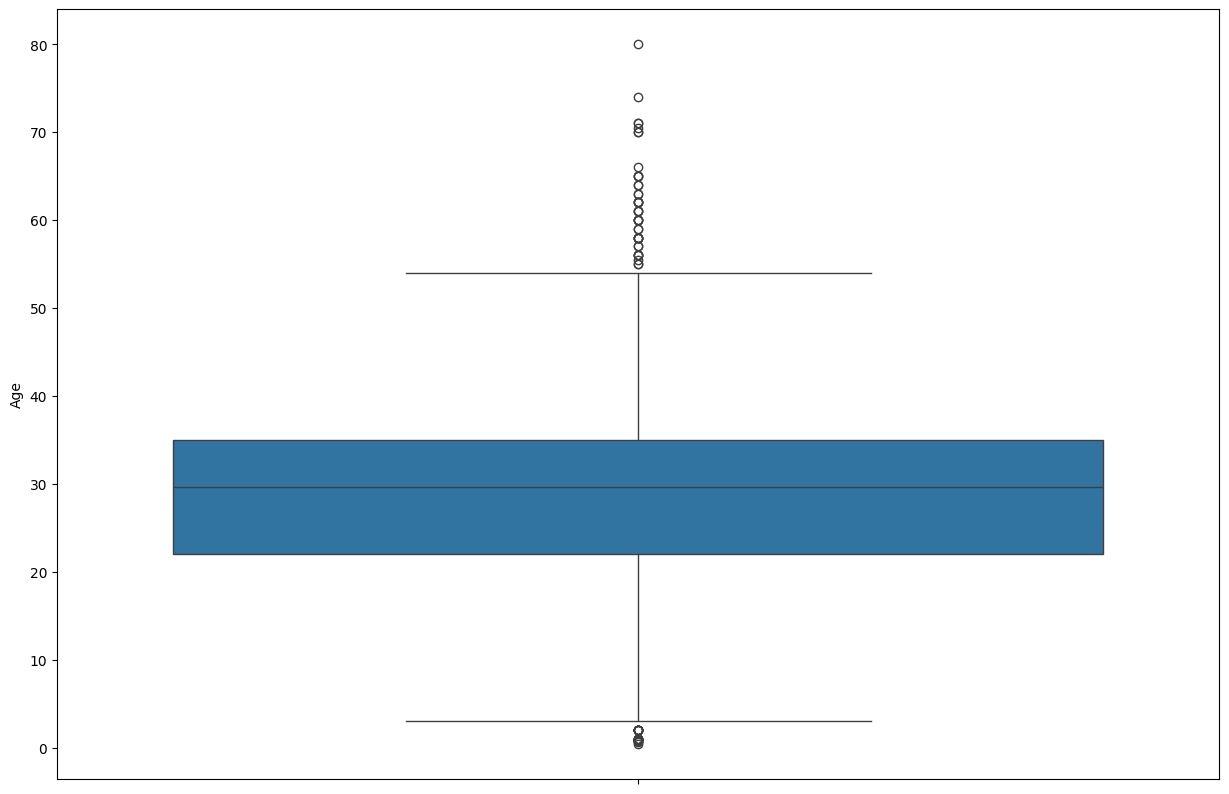

In [19]:
#Checking outliers for Age
outliers= df['Age']
plt.figure(figsize=(15,10))
sns.boxplot(data = outliers)
plt.show()

In [ ]:
#Thogh outliers seesm to be in box plot,the number of ouleirs are comapritively high and considering that it is age and as such they are not deleted or clipped


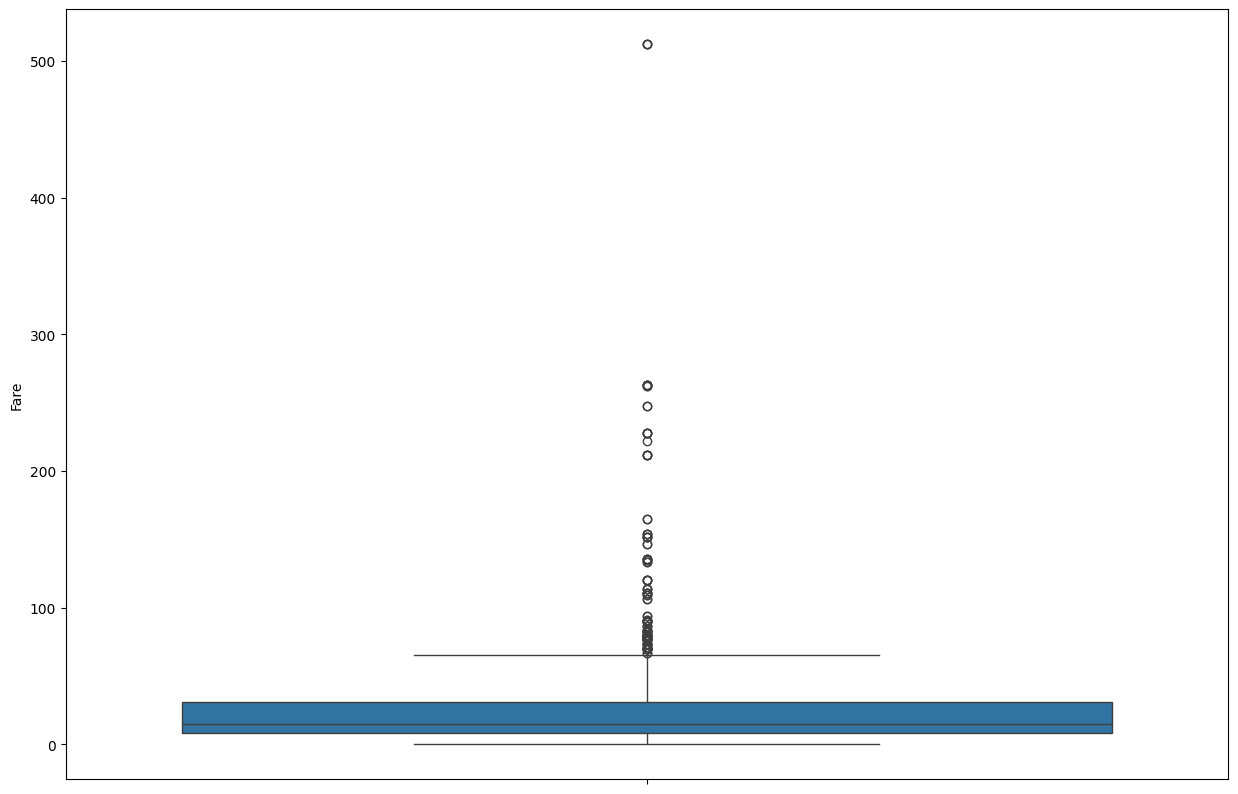

In [20]:
#Checking outliers for fare
outliers= df['Fare']
plt.figure(figsize=(15,10))
sns.boxplot(data = outliers)
plt.show()

In [25]:
df[df['Fare']>300].Fare.count()

3

In [ ]:
#Though outliers seesm to be in box plot,the number of ouleirs are comapritively high
#and considering that it is fare removing only the rows whose fares are grater than 300 ie 3 numbers which are completely out of range

In [26]:
#Removing Outliers
df=df[df['Fare']<=300]

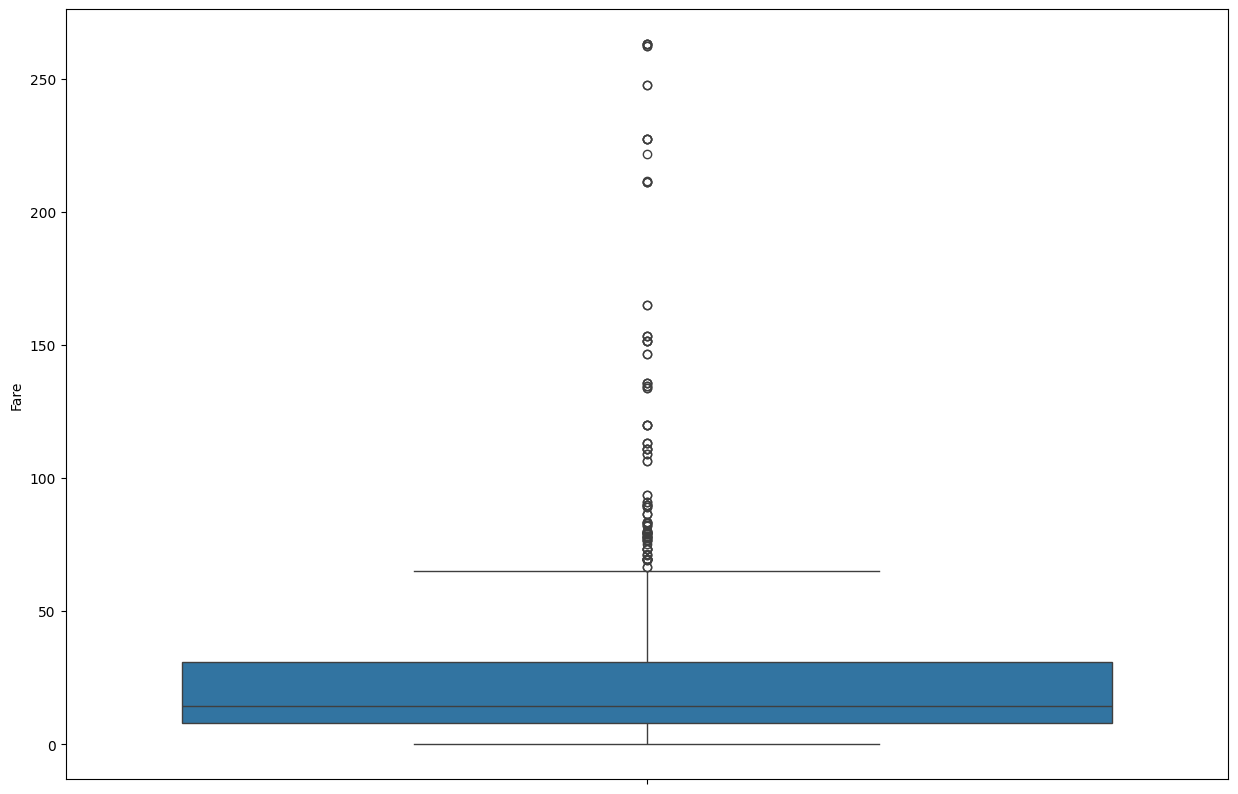

In [27]:
#Checking outliers for fare after removing the three
outliers= df['Fare']
plt.figure(figsize=(15,10))
sns.boxplot(data = outliers)
plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  888 non-null    int64  
 1   Pclass    888 non-null    int64  
 2   Sex       888 non-null    object 
 3   Age       888 non-null    float64
 4   SibSp     888 non-null    int64  
 5   Parch     888 non-null    int64  
 6   Fare      888 non-null    float64
 7   Embarked  888 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.4+ KB


In [29]:
#Encoding the feature sex by one hot encoding
df=pd.get_dummies(df,columns=['Sex'],dtype=int)

In [30]:
#Encoding the feature Embarked by one hot encoding
df=pd.get_dummies(df,columns=['Embarked'],dtype=int)


In [31]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [32]:
#Scaling the age and Fare columns
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df['Age']=ss.fit_transform(df[['Age']])
df['Fare']=ss.fit_transform(df[['Fare']])

In [33]:
#Seeing the coorelation between features in the df
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.334068,-0.071882,-0.033395,0.082157,0.261742,0.545899,-0.545899,0.160969,0.004981,-0.143763
Pclass,-0.334068,1.000000,-0.330522,0.080937,0.018212,-0.604960,-0.132881,0.132881,-0.234999,0.220331,0.066029
Age,-0.071882,-0.330522,1.000000,-0.232092,-0.179336,0.093604,-0.084200,0.084200,0.029208,-0.013411,-0.017039
SibSp,-0.033395,0.080937,-0.232092,1.000000,0.415141,0.211816,0.114799,-0.114799,-0.056637,-0.026861,0.066452
Parch,0.082157,0.018212,-0.179336,0.415141,1.000000,0.263910,0.247003,-0.247003,-0.010733,-0.081351,0.060792
Fare,0.261742,-0.604960,0.093604,0.211816,0.263910,1.000000,0.222361,-0.222361,0.245481,-0.129578,-0.132543
Sex_female,0.545899,-0.132881,-0.084200,0.114799,0.247003,0.222361,1.000000,-1.000000,0.083882,0.074207,-0.120176
Sex_male,-0.545899,0.132881,0.084200,-0.114799,-0.247003,-0.222361,-1.000000,1.000000,-0.083882,-0.074207,0.120176
Embarked_C,0.160969,-0.234999,0.029208,-0.056637,-0.010733,0.245481,0.083882,-0.083882,1.000000,-0.147200,-0.780515
Embarked_Q,0.004981,0.220331,-0.013411,-0.026861,-0.081351,-0.129578,0.074207,-0.074207,-0.147200,1.000000,-0.503435


<Axes: >

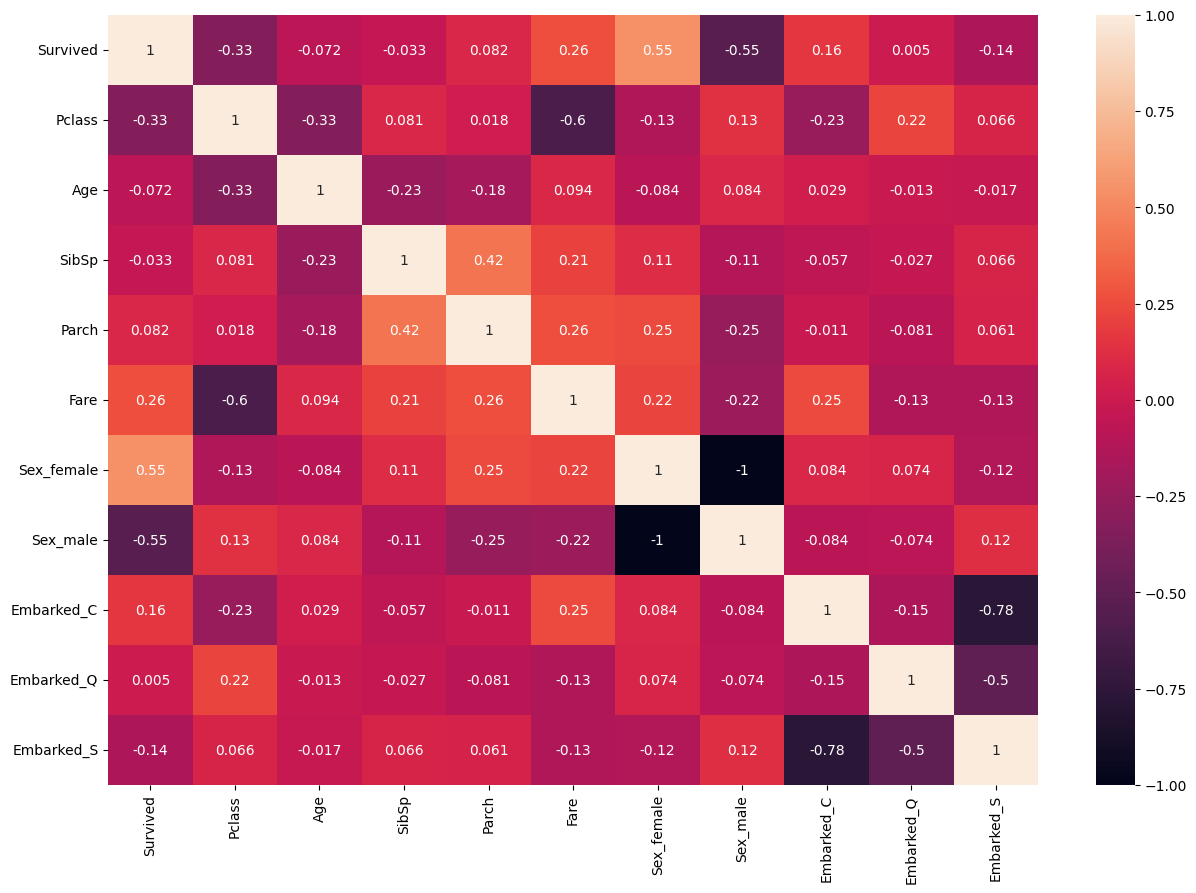

In [34]:
#heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
#

In [ ]:
#Passenger class and Fare are having a  negative correlation but not tthe extent one of them can be dropped dropped


In [35]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,-0.590209,1,0,-0.566959,0,1,0,0,1
1,1,1,0.639380,1,0,0.989016,1,0,1,0,0
2,1,3,-0.282812,0,0,-0.550557,1,0,0,0,1
3,1,1,0.408832,1,0,0.547171,1,0,0,0,1
4,0,3,0.408832,0,0,-0.547519,0,1,0,0,1


In [36]:
#defining features and labels
X=df.drop('Survived',axis=1)
y=df['Survived']

In [37]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
#Creating the  KNN model with the traing data
#Finding the best value of k
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbours=np.arange(3,15)
for k in neighbours:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(X_train,y_train)
  y_pred=classifier.predict(X_test)
  acc= accuracy_score(y_test,y_pred)
  metric_k.append(acc)

In [40]:
metric_k #k=3 is the best option

[0.8595505617977528,
 0.8426966292134831,
 0.8314606741573034,
 0.8258426966292135,
 0.8146067415730337,
 0.848314606741573,
 0.8258426966292135,
 0.8202247191011236,
 0.8314606741573034,
 0.8314606741573034,
 0.8258426966292135,
 0.8089887640449438]

In [41]:
#Creating the  KNN model with the traing data
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
model_knn=classifier.fit(X_train,y_train)

In [42]:
#Creating the  SVMmodel with the training data
from sklearn.svm import SVC
sv_clf=SVC()
model_svm=sv_clf.fit(X_train,y_train)

In [46]:
## K Fold validation
from sklearn.model_selection import KFold
kfold_val=KFold(10) # no of folds is 10 here

In [48]:
#K Fold cross validation for KNN Model
from sklearn.model_selection import cross_val_score
cv_result_knn=cross_val_score(model_knn,X_train,y_train,cv=kfold_val)
cv_result_knn

array([0.8028169 , 0.83098592, 0.77464789, 0.76056338, 0.71830986,
       0.83098592, 0.8028169 , 0.78873239, 0.73239437, 0.78873239])

In [49]:
cv_result_knn.mean()

0.7830985915492958

In [51]:
#K Fold cross validation for KNN Model
cv_result_svm=cross_val_score(model_svm,X_train,y_train,cv=kfold_val)
cv_result_svm

array([0.84507042, 0.85915493, 0.8028169 , 0.87323944, 0.81690141,
       0.83098592, 0.74647887, 0.81690141, 0.77464789, 0.83098592])

In [52]:
cv_result_svm.mean()

0.819718309859155

In [ ]:
##From K fold cross validation th e SVM model seems to be better

In [ ]:
##Stratified cross validation

In [53]:
#statified cross validation for KNN Model
from sklearn.model_selection import StratifiedKFold
sk_fold=StratifiedKFold(10)

In [54]:
#statified cross validation for SVMN Model
skv_result_knn=cross_val_score(model_knn,X_train,y_train,cv=sk_fold)

In [55]:
skv_result_knn.mean()

0.7830985915492958

In [56]:
skv_result_svm=cross_val_score(model_svm,X_train,y_train,cv=sk_fold)

In [57]:
skv_result_svm.mean()

0.819718309859155

In [ ]:
#From startified kfold also SVM modl seems to be better

In [ ]:
#No much difference between the two cross validation methods

In [ ]:
#Predicting with the best model ie SVM

In [58]:

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
y_pred=model_svm.predict(X_test)
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred))
print('Recall is', recall_score(y_test, y_pred))
print('f1 score is', f1_score(y_test,y_pred))

Accuracy is 0.848314606741573
Precision is 0.821917808219178
Recall is 0.8108108108108109
f1 score is 0.8163265306122449
